<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/exporta%C3%A7%C3%B5es_mercosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

country          ARG       BOL       BRA       CHL       PER       PRY  \
date                                                                     
2019-01-01  0.780188  0.711441  0.687367  0.722413  0.771606  0.918219   
2020-01-01  0.622656  0.517414  0.631011  0.741238  0.644763  0.790899   
2021-01-01  0.853545  0.783397  0.838398  0.942855  0.927566  0.951173   
2022-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  0.965110   
2023-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  0.965110   

country          URY  
date                  
2019-01-01  0.774009  
2020-01-01  0.606824  
2021-01-01  0.839665  
2022-01-01  1.000000  
2023-01-01  1.000000  


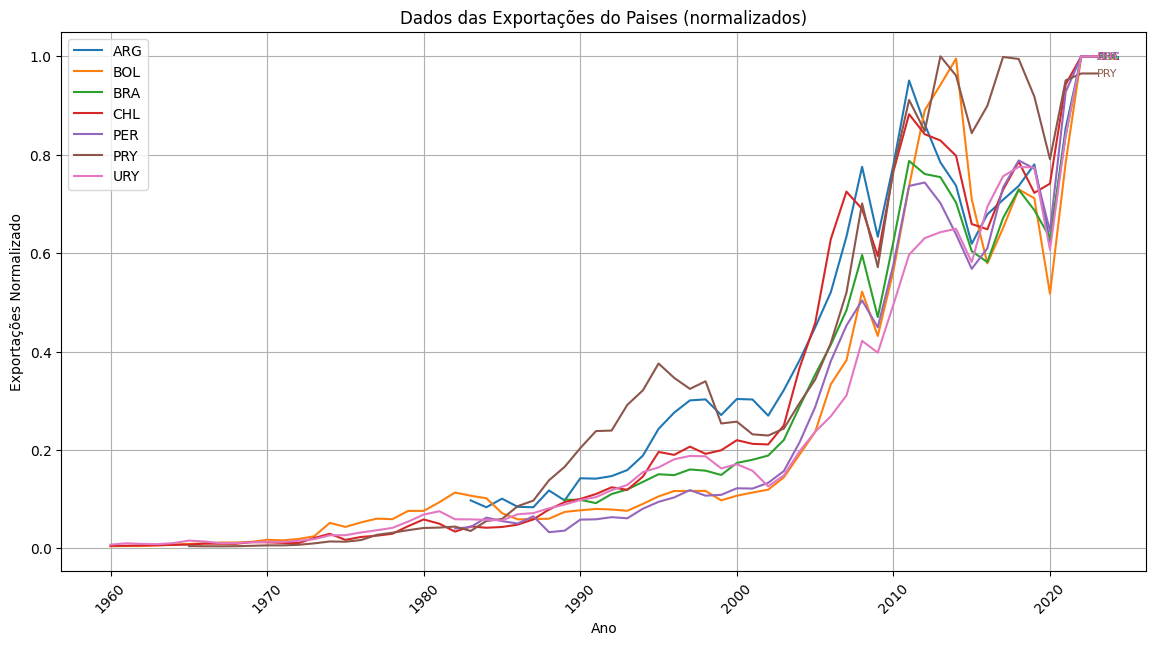

In [23]:
# Análise das exportações dos países do mercosul
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Países de interesse
paises = ["BRA", "ARG", "PRY", "URY", "PER", "BOL", "CHL"]

# Indicador das exportações (NY.GDP.MKTP.CD)
indicador_pib = "NE.EXP.GNFS.CD"

def consultar_dados_pais(codigo_pais, indicador):
    """
    Consulta dados de um indicador específico para um país na API do Banco Mundial.

    Args:
        codigo_pais: Código do país (por exemplo, "BRA").
        indicador: Código do indicador (por exemplo, "NY.GDP.MKTP.CD").

    Returns:
        DataFrame com os dados consultados ou mensagem de erro.
    """
    url = f"http://api.worldbank.org/v2/country/{codigo_pais}/indicator/{indicador}?format=json&per_page=1000"
    resposta = requests.get(url)

    if resposta.status_code == 200:
        dados = json.loads(resposta.text)
        if len(dados) > 1 and isinstance(dados[1], list):
            valores = dados[1]
            df = pd.DataFrame(valores)
            df['country'] = codigo_pais
            return df[['date', 'value', 'country']]
        else:
            print(f"Estrutura da resposta inesperada para {codigo_pais}: {json.dumps(dados, indent=2)}")
            return pd.DataFrame()
    else:
        print(f"Erro ao consultar dados de {indicador} para {codigo_pais}: {resposta.status_code}")
        return pd.DataFrame()

# Coletando dados para todos os países
data_frames = []
for codigo_pais in paises:
    df_pais = consultar_dados_pais(codigo_pais, indicador_pib)
    if not df_pais.empty:
        data_frames.append(df_pais)

# Concatenando todos os dados em um único DataFrame
gdp_data = pd.concat(data_frames)

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Pivotando os dados para ter países como colunas e datas como índice
gdp_pivot = gdp_data.pivot(index='date', columns='country', values='value')

# Tratando dados faltantes: preenchendo com dados anteriores existentes
gdp_pivot = gdp_pivot.fillna(method='ffill')

# Normalizando os dados (por exemplo, dividindo pelo valor máximo de cada país)
gdp_normalized = gdp_pivot / gdp_pivot.max()

# Verificando o DataFrame normalizado
print(gdp_normalized.tail())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados das Exportações do Paises (normalizados)")
plt.xlabel("Ano")
plt.ylabel("Exportações Normalizado")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Removendo a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()


country     ARG       BOL  BRA       CHL  PER  PRY       URY
date                                                        
1960-01-01  NaN  0.008481  NaN  0.012982  NaN  NaN  0.016976
1961-01-01  NaN  0.009226  NaN  0.015254  NaN  NaN  0.022479
1962-01-01  NaN  0.010087  NaN  0.017788  NaN  NaN  0.024778
1963-01-01  NaN  0.010862  NaN  0.017662  NaN  NaN  0.021823
1964-01-01  NaN  0.012238  NaN  0.018839  NaN  NaN  0.027686


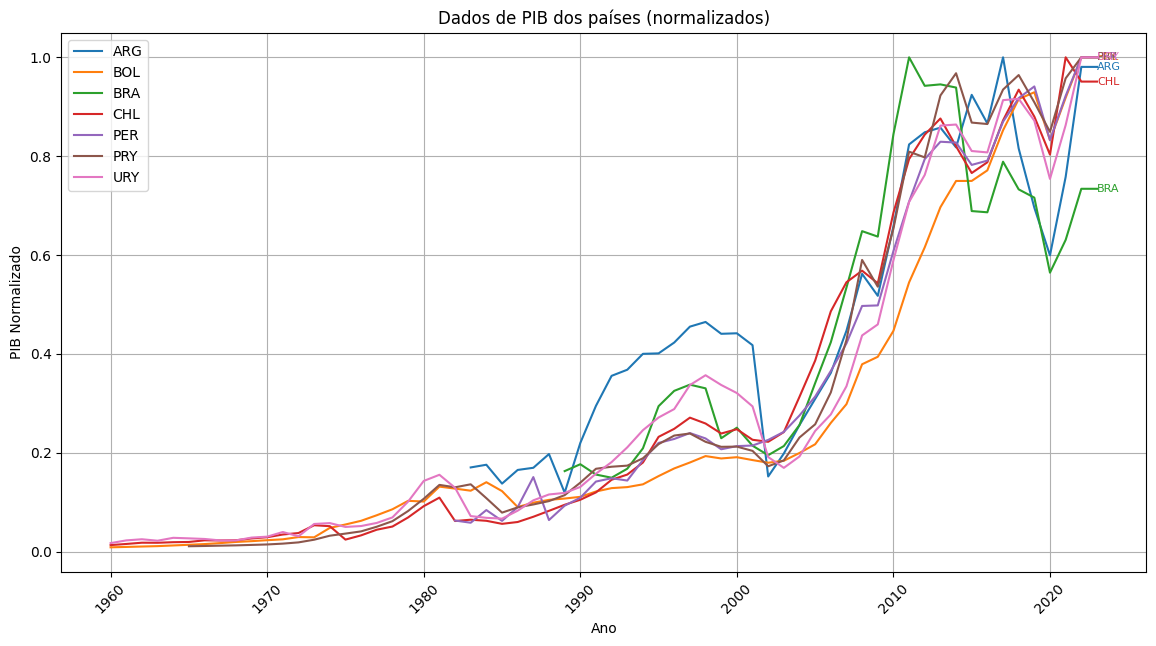

In [24]:
# Análise do PIB dos países
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Países de interesse
paises = ["BRA", "ARG", "PRY", "URY", "PER", "BOL", "CHL"]

# Indicador do PIB (NY.GDP.MKTP.CD)
indicador_pib = "NY.GDP.MKTP.CD"

def consultar_dados_pais(codigo_pais, indicador):
    """
    Consulta dados de um indicador específico para um país na API do Banco Mundial.

    Args:
        codigo_pais: Código do país (por exemplo, "BRA").
        indicador: Código do indicador (por exemplo, "NY.GDP.MKTP.CD").

    Returns:
        DataFrame com os dados consultados ou mensagem de erro.
    """
    url = f"http://api.worldbank.org/v2/country/{codigo_pais}/indicator/{indicador}?format=json&per_page=1000"
    resposta = requests.get(url)

    if resposta.status_code == 200:
        dados = json.loads(resposta.text)
        if len(dados) > 1 and isinstance(dados[1], list):
            valores = dados[1]
            df = pd.DataFrame(valores)
            df['country'] = codigo_pais
            return df[['date', 'value', 'country']]
        else:
            print(f"Estrutura da resposta inesperada para {codigo_pais}: {json.dumps(dados, indent=2)}")
            return pd.DataFrame()
    else:
        print(f"Erro ao consultar dados de {indicador} para {codigo_pais}: {resposta.status_code}")
        return pd.DataFrame()

# Coletando dados para todos os países
data_frames = []
for codigo_pais in paises:
    df_pais = consultar_dados_pais(codigo_pais, indicador_pib)
    if not df_pais.empty:
        data_frames.append(df_pais)

# Concatenando todos os dados em um único DataFrame
gdp_data = pd.concat(data_frames)

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Pivotando os dados para ter países como colunas e datas como índice
gdp_pivot = gdp_data.pivot(index='date', columns='country', values='value')

# Tratando dados faltantes: preenchendo com dados anteriores ou posteriores existentes
gdp_pivot = gdp_pivot.fillna(method='ffill')

# Normalizando os dados (por exemplo, dividindo pelo valor máximo de cada país)
gdp_normalized = gdp_pivot / gdp_pivot.max()

# Verificando o DataFrame normalizado
print(gdp_normalized.head())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados de PIB dos países (normalizados)")
plt.xlabel("Ano")
plt.ylabel("PIB Normalizado")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Removendo a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()



In [13]:
gdp_normalized

country,ARG,BOL,BRA,CHL,PER,PRY,URY
date,,,,,,,
1960-01-01,0.000000,0.008481,0.000000,0.012982,0.000000,0.000000,0.016976
1961-01-01,0.000000,0.009226,0.000000,0.015254,0.000000,0.000000,0.022479
1962-01-01,0.000000,0.010087,0.000000,0.017788,0.000000,0.000000,0.024778
1963-01-01,0.000000,0.010862,0.000000,0.017662,0.000000,0.000000,0.021823
1964-01-01,0.000000,0.012238,0.000000,0.018839,0.000000,0.000000,0.027686
...,...,...,...,...,...,...,...
2019-01-01,0.695673,0.929264,0.716046,0.880024,0.941039,0.908995,0.871749
2020-01-01,0.599322,0.832340,0.564227,0.803137,0.832322,0.849238,0.753991
2021-01-01,0.758050,0.918148,0.630552,1.000000,0.922047,0.957543,0.862809
